In [1]:
%pip install tensorflow
                           

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 1.7 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 5.9 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 KB 503.9 kB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install transformers

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 5.9 MB/s eta 0:00:0000:01m00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.1 MB/s eta 0:00:00a 0:00:01
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertModel, BertConfig
import torch
import re
import os
from torch.utils.data import TensorDataset, DataLoader, Dataset, RandomSampler, SequentialSampler

In [3]:
#set GPUS
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'


In [4]:
MAX_LENS = 200
Batch_size = 16
learning_rate = 5e-5
number_epoch = 5


In [12]:
#build bert model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [5]:
#construct bert model

class bert_model(torch.nn.Module):
    #construct class
    def __init__(self):
        super().__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased')
        self.drop = torch.nn.Dropout(0.3)
        self.out = torch.nn.Linear(768,11)
    
    def forward(self, ids, mask, token_type_ids):
        unw, out = self.bert_model(ids, attention_mask = mask, token_type_ids = token_type_ids)[0], self.bert_model(ids, attention_mask = mask, token_type_ids = token_type_ids)[1]
        #add drop layer
        drop_out = self.drop(out)
        #final layer
        out_final = self.out(drop_out)
        return out_final
    

model_bert = bert_model()
model_bert.to(device)




        
        

bert_model(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

In [6]:
#get my current path
current_path = os.getcwd()
print(current_path)
file_path_chapter_four = '/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_5_eng_version_hsien.csv'

/Users/wangxuechun/unsw/UNSW-Thesis-/jupyter_notebook


In [7]:
#modified the google dataframe
original_google = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_5_trans.csv')
df_modified_google = original_google.drop('Chinese_verse', axis=1)
df_google = df_modified_google.rename(columns={'English_Verse': 'English_Verse_chap5_google'})
df_google.to_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_5_eng_version_google.csv')

In [8]:
#load my dataset
df_chapter_four = pd.read_csv(file_path_chapter_four)
df_chapter_four.head()


,English_Verse_chap5_hsien
0,After Ah Q had kowtowed and complied with the ...
1,After getting up he loafed about the streets a...
2,"A good many days later, however, he felt even ..."
3,When Ah Q could stand it no longer he went to ...
4,"""There is nothing, nothing at all! Go away!"""


In [9]:
#store length of each verses
token_len = []
for verses in df_chapter_four.English_Verse_chap5_yiyun:
    tokens = tokenizer.encode(verses, max_length=1000)
    token_len.append(len(tokens))

print(len(token_len))
print(token_len)



NameError: name 'df_chapter_four' is not defined

Text(0.5, 9.444444444444438, 'Token count')

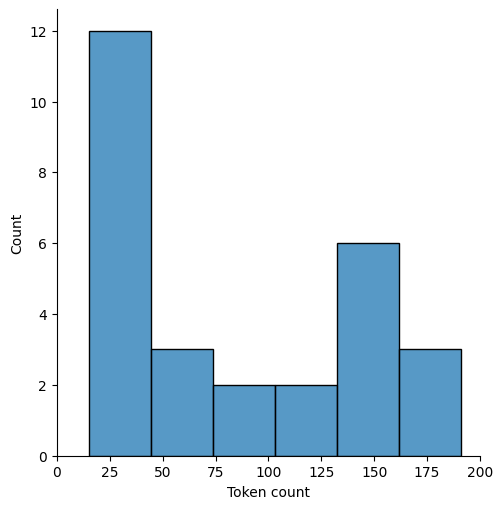

In [13]:
#plot the distribution of paragraphs lengths
sns.displot(token_len)
plt.xlim([0, 200])
plt.xlabel('Token count')

In [9]:
#test function
def test():
    model_bert.eval()
    bert_outputs = []

    with torch.no_grad():
        for unw, data in enumerate(test_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model_bert(ids, mask, token_type_ids)

            bert_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

    return bert_outputs


In [10]:
#construct my data frame
class DatasetParagraphs(Dataset):
    #intialize function
    def __init__ (self, dataset, tokenizer, max_lens):
        self.tokenizer = tokenizer 
        self.dataset = dataset
        self.tweet = dataset['tweets']
        self.targets = self.dataset.list
        self.max_lens = max_lens


    def __len__(self):
        return len(self.tweet)

    #get item
    def __getitem__(self, num):
        tweet = str(self.tweet[num])
        tweet = " ".join(tweet.split())
        inputs = self.tokenizer.encode_plus(
            tweet,
            None, 
            add_special_tokens = True,
            max_length = self.max_lens,
            pad_to_max_length = True,
            return_attention_mask = True
        )

        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs['token_type_ids']

        return {
            'ids' : torch.tensor(ids, dtype = torch.long),
            'mask' : torch.tensor(mask, dtype = torch.long),
            'token_type_ids' : torch.tensor(token_type_ids, dtype= torch.long),
            'targets' : torch.tensor(self.targets[num], dtype = torch.float)
        }

    


In [13]:
#code optimization sentiment analysis
file_paths = ['/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_4_eng_version_hsien.csv','/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_4_eng_version_google.csv','/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_4_eng_version_yiyun.csv','/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_5_eng_version_hsien.csv', '/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_5_eng_version_google.csv', '/Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_5_eng_version_yiyun.csv']
suffixes = ['hsien_chapt4', 'google_chapt4', 'yiyun_chapt4','hsien_chapt5', 'google_chapt5', 'yiyun_chapt5']
df_list_count = []
for i, suffix in zip(file_paths, suffixes):
    print(f"Processing file: {i}, with suffix: {suffix}")
    #load the dataset
    df = pd.read_csv(i)
    df_new = pd.DataFrame()
    chapter = suffix.split('_')[-1]  # 'ch4' or 'ch5'
    
    column_name = f"English_Verse_chap{chapter[-1]}_{suffix.split('_')[0]}" 
    df_new['tweets'] = df[column_name]
    values = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]] * len(df)
    df_new['list'] = values

    #customize my dataset
    dataset_new = DatasetParagraphs(df_new, tokenizer, MAX_LENS)
    param = {'batch_size' : 1,
            'shuffle' : False,
            'num_workers' : 0
    }

    test_loader = DataLoader(dataset_new, **param)
    test_outputs = test()

    #we got the test outputs values
    test_outputs = np.array(test_outputs)

    for i in range(test_outputs.shape[0]):
        for j in range(test_outputs.shape[1]):
                if test_outputs[i][j] >= 0.5:
                    test_outputs[i][j] = 1
                else:
                    test_outputs[i][j] = 0
    df_new['Optimistic'] = "None"
    df_new['Thankful'] = "None"
    df_new['Empathetic'] = "None"
    df_new['Pessimistic'] = "None"
    df_new['Anxious'] = "None"
    df_new['Sad'] = "None"
    df_new['Annoyed'] = "None"
    df_new['Denial'] = "None"
    df_new['Official report'] = "None"
    df_new['Surprise'] = "None"
    df_new['Joking'] = "None"

    for i in range(len(test_outputs)):
        df_new['Optimistic'].iloc[i] = test_outputs[i][0]
        df_new['Thankful'].iloc[i] = test_outputs[i][1]
        df_new['Empathetic'].iloc[i] = test_outputs[i][2]
        df_new['Pessimistic'].iloc[i] = test_outputs[i][3]
        df_new['Anxious'].iloc[i] = test_outputs[i][4]
        df_new['Sad'].iloc[i] = test_outputs[i][5]
        df_new['Annoyed'].iloc[i] = test_outputs[i][6]
        df_new['Denial'].iloc[i] = test_outputs[i][7]
        df_new['Official report'].iloc[i] = test_outputs[i][8]
        df_new['Surprise'].iloc[i] = test_outputs[i][9]
        df_new['Joking'].iloc[i] = test_outputs[i][10]
    
    #deep clean the dataframe
    df_new = df_new.drop(['list','Official report'], axis = 1)
    df_count = pd.DataFrame()

    df_count = pd.DataFrame(index=[0], columns=['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Surprise', 'Joking'])
    df_count[:] = "None"

    # Define a function to count 1.0 in columns
    def count_ones(column):
        return (df_new[column] == 1.0).sum()
    
    # Use the function to count and assign values
    df_count['Optimistic'] = count_ones('Optimistic')
    df_count['Thankful'] = count_ones('Thankful')
    df_count['Empathetic'] = count_ones('Empathetic')
    df_count['Pessimistic'] = count_ones('Pessimistic')
    df_count['Anxious'] = count_ones('Anxious')
    df_count['Sad'] = count_ones('Sad')
    df_count['Annoyed'] = count_ones('Annoyed')
    df_count['Denial'] = count_ones('Denial')
    df_count['Surprise'] = count_ones('Surprise')
    df_count['Joking'] = count_ones('Joking')

    df_list_count.append(df_count)

df_list_count



    
    
    
    
    

    

    

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Processing file: /Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_4_eng_version_hsien.csv, with suffix: hsien_chapt4


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length`

Processing file: /Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_4_eng_version_google.csv, with suffix: google_chapt4


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Processing file: /Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_4_eng_version_yiyun.csv, with suffix: yiyun_chapt4


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Processing file: /Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_5_eng_version_hsien.csv, with suffix: hsien_chapt5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Processing file: /Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_5_eng_version_google.csv, with suffix: google_chapt5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Processing file: /Users/wangxuechun/unsw/UNSW-Thesis-/data_processing/chapter_5_eng_version_yiyun.csv, with suffix: yiyun_chapt5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


[   Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
 0          26        39           3           42       22   45       37   
 
    Denial  Surprise  Joking  
 0       6        11      29  ,
    Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
 0          30        43           1           44       24   45       42   
 
    Denial  Surprise  Joking  
 0       3        12      29  ,
    Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
 0          19        37           2           39       17   41       33   
 
    Denial  Surprise  Joking  
 0       2        20      36  ,
    Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
 0          16        27           0           26       18   28       25   
 
    Denial  Surprise  Joking  
 0       3         8      14  ,
    Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
 0          17        28           2           28       

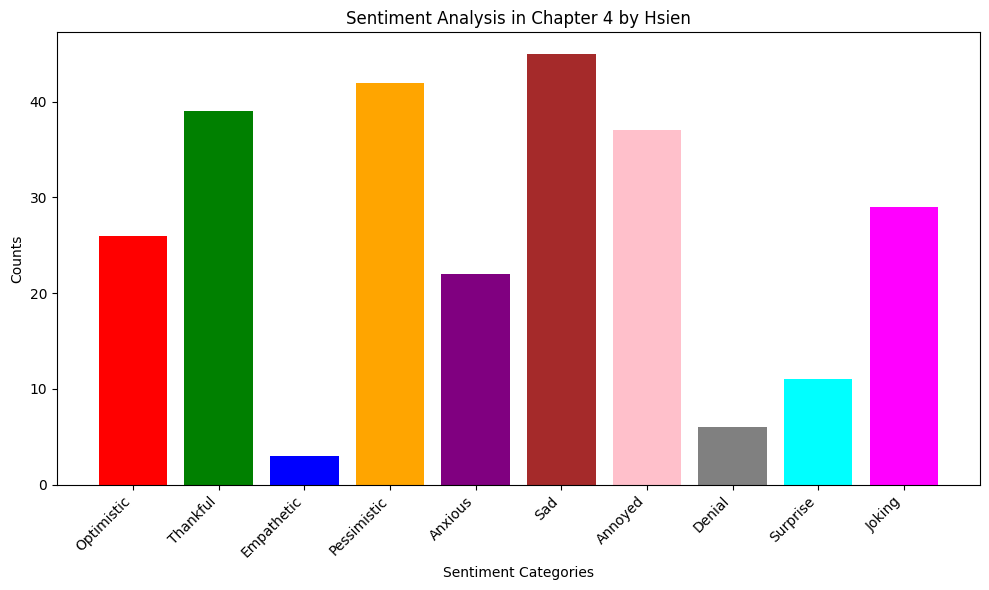

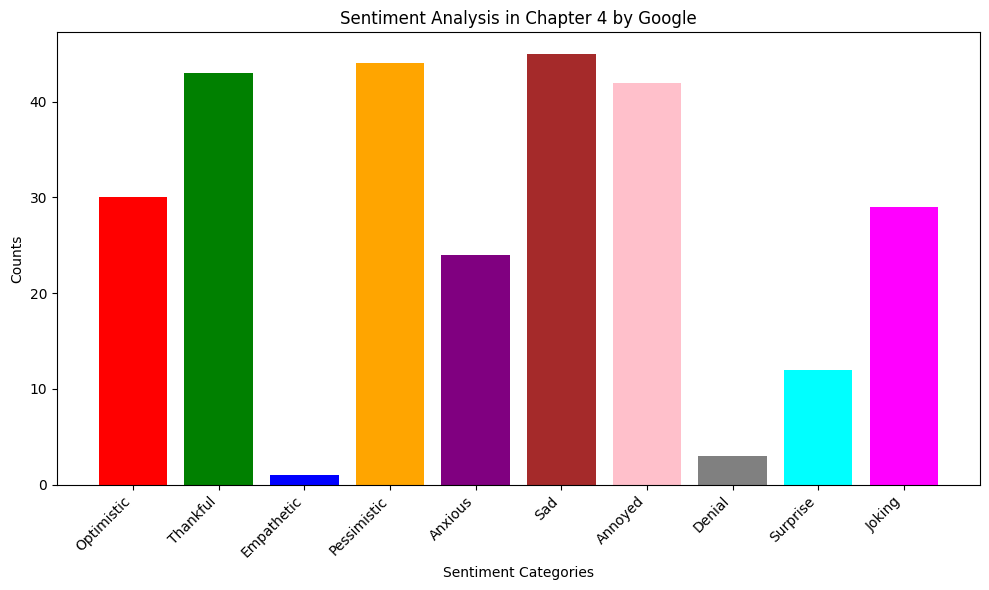

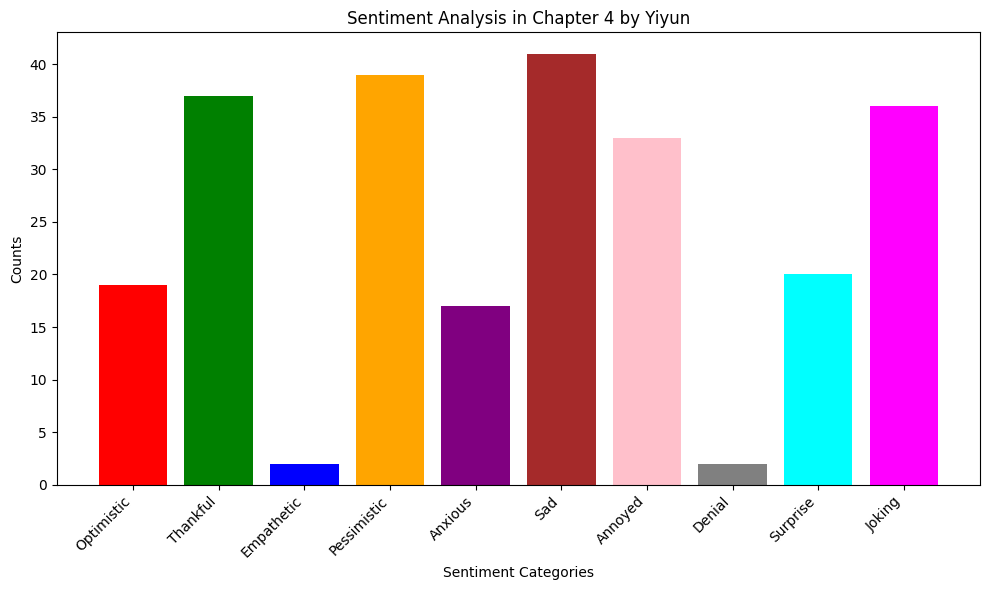

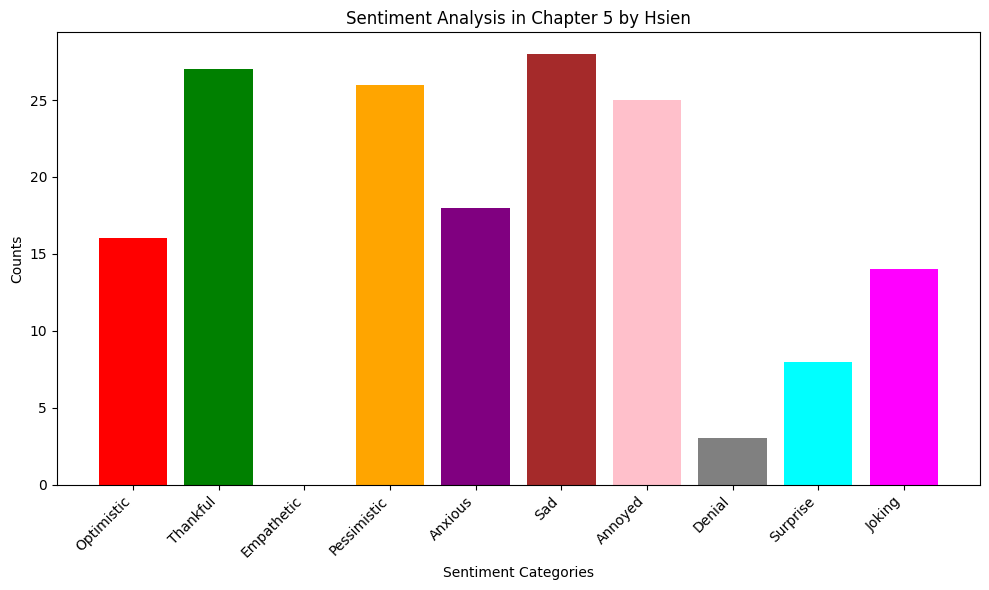

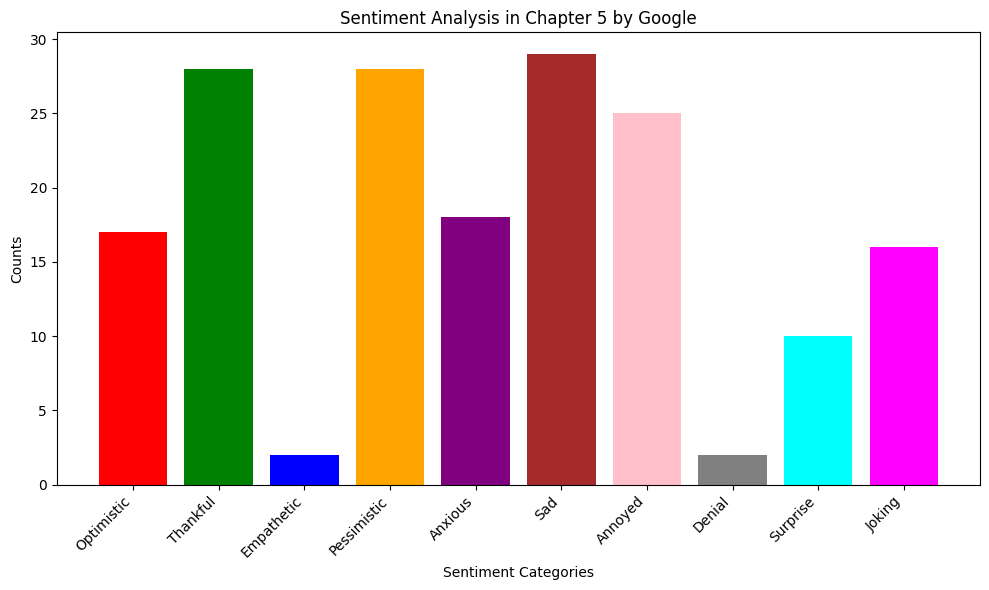

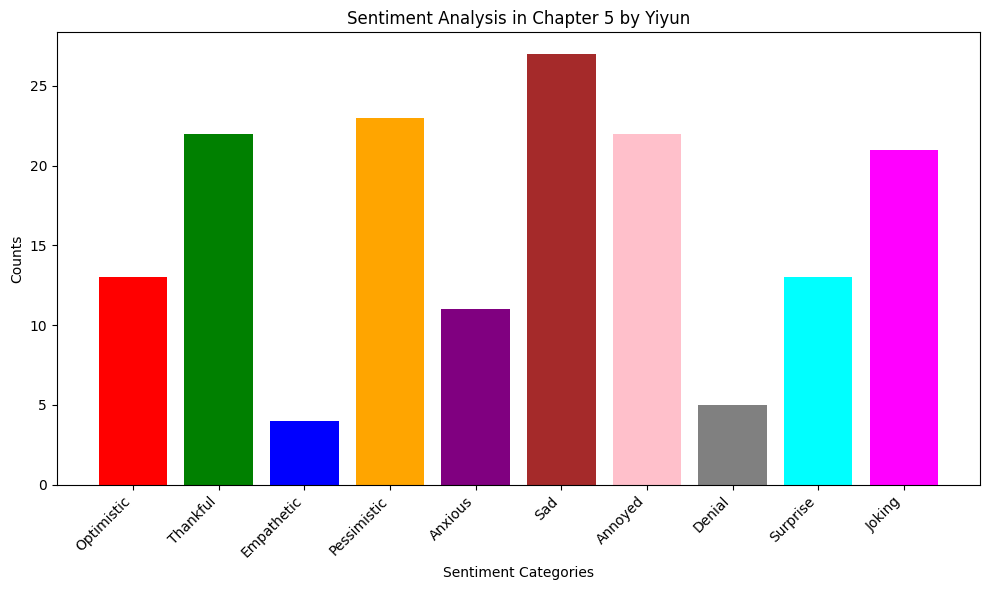

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

for df, suffix in zip(df_list_count, suffixes):
    # Convert data to numeric if not already
    df_numeric = df.apply(pd.to_numeric)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(df_numeric.columns, df_numeric.iloc[0], color=colors[:len(df_numeric.columns)])
    

    author, chapter_info = suffix.split('_')[0], suffix.split('_')[1]
    chapter = 'Chapter ' + chapter_info[-1]  
    
    # Adding titles and labels
    plt.title(f'Sentiment Analysis in {chapter} by {author.capitalize()}')
    plt.xlabel('Sentiment Categories')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    file_path = '/Users/wangxuechun/unsw/UNSW-Thesis-/plots_for_sentiment_analysis/'

    filename = f"{file_path}/{author}_{chapter_info}.png"  
    plt.savefig(filename, format='png', dpi=300)  
    plt.show()
  



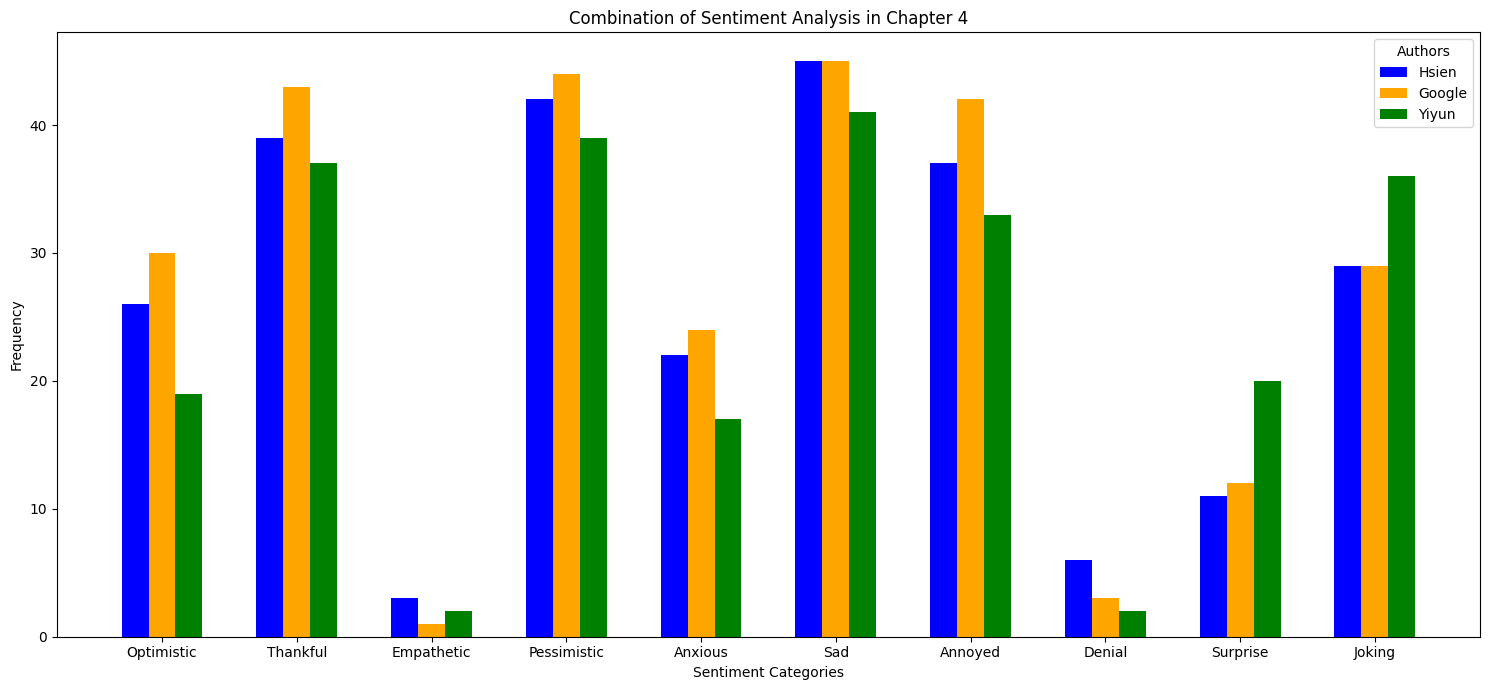

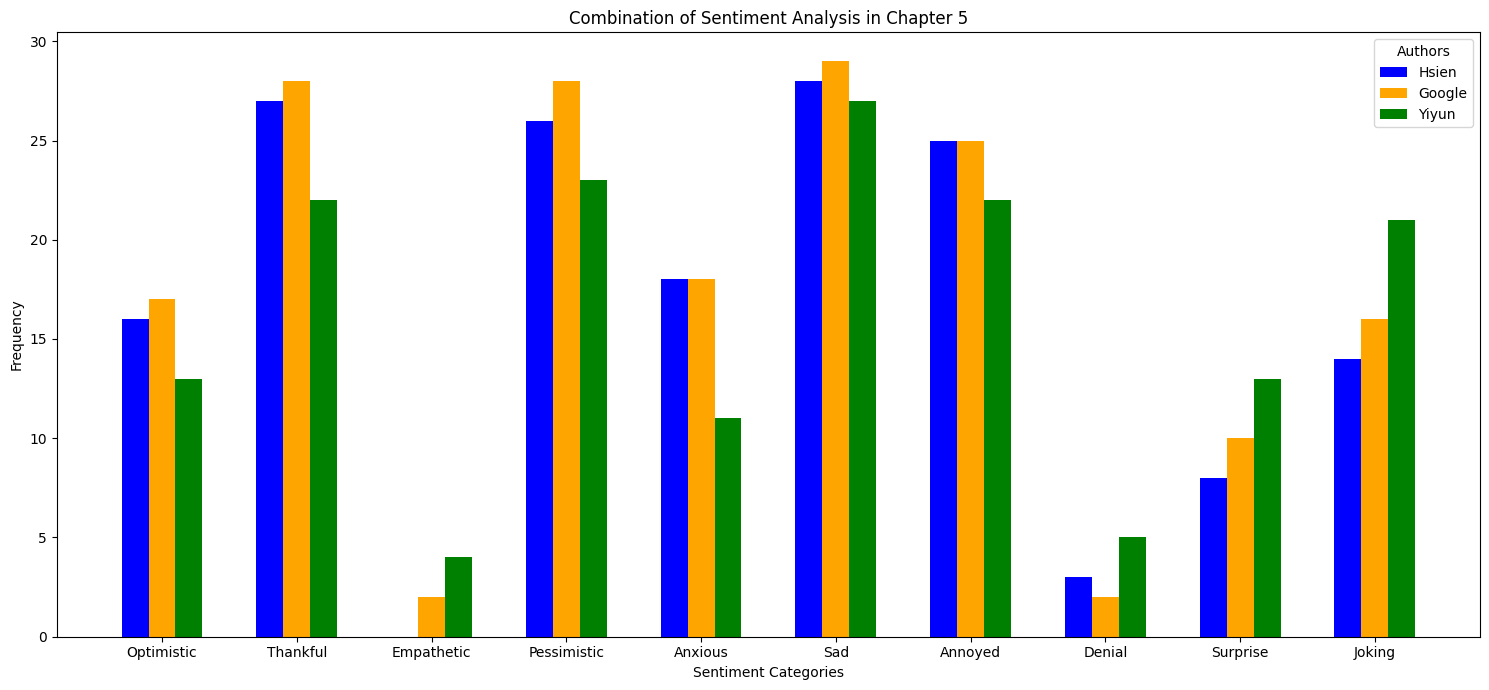

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

counts_chapt4 = {suffix: df for df, suffix in zip(df_list_count, suffixes) if 'chapt4' in suffix}
counts_chapt5 = {suffix: df for df, suffix in zip(df_list_count, suffixes) if 'chapt5' in suffix}

# Define colors for each author
colors = ['blue', 'orange', 'green']

def plot_grouped_bar(counts_dict, chapter_num):
    num_categories = len(counts_dict[next(iter(counts_dict))].columns)
    
    bar_positions = np.arange(num_categories)
    bar_width = 0.2
    
    plt.figure(figsize=(15, 7))
    
    for i, (author_suffix, df) in enumerate(counts_dict.items()):
        # Convert data to numeric if not already
        df_numeric = df.apply(pd.to_numeric).iloc[0]
        # Plot
        plt.bar(bar_positions + i * bar_width, df_numeric.values, width=bar_width, color=colors[i], label=author_suffix.split('_')[0].capitalize())

    # Set the position and labels for the x-axis ticks
    plt.xticks(bar_positions + bar_width*(len(counts_dict)/2 - 0.5), counts_dict[next(iter(counts_dict))].columns)
    
    # Adding titles and labels
    plt.title(f'Combination of Sentiment Analysis in Chapter {chapter_num}')
    plt.xlabel('Sentiment Categories')
    plt.ylabel('Frequency')
    plt.legend(title="Authors")
    
    plt.tight_layout()

    file_path = '/Users/wangxuechun/unsw/UNSW-Thesis-/plots_for_sentiment_analysis/'
    filename = f"{file_path}chapter_{chapter_num}_combination.png"  
    plt.savefig(filename, format='png', dpi=300)  
    plt.show()
    plt.close()  # Close the plot to free up memory

# Plot for Chapter 4
plot_grouped_bar(counts_chapt4, 4)

# Plot for Chapter 5
plot_grouped_bar(counts_chapt5, 5)





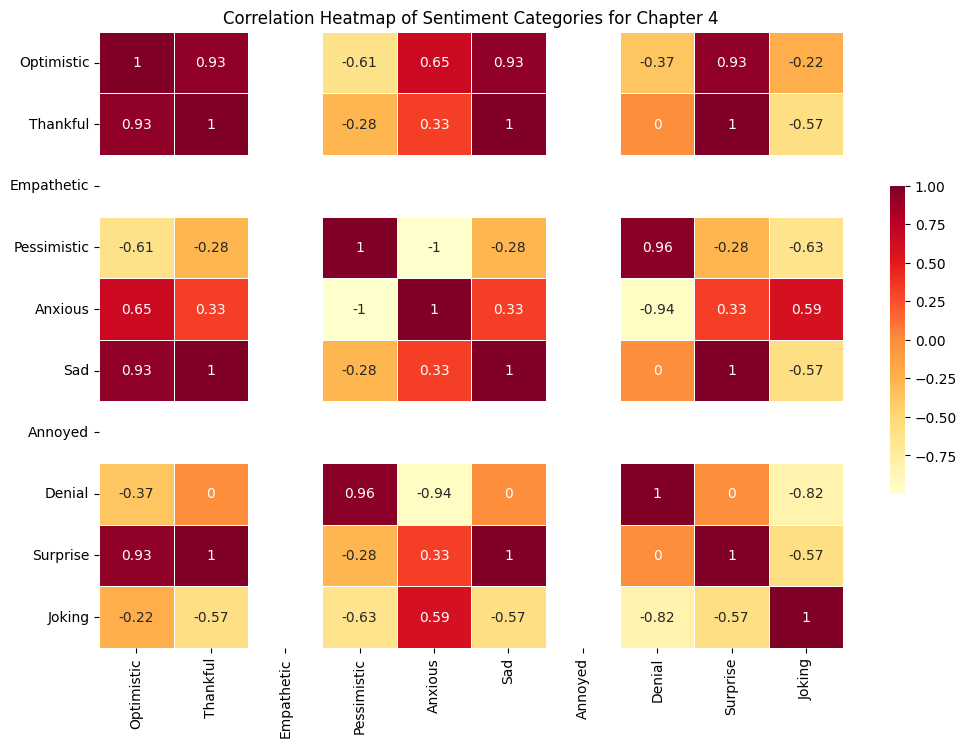

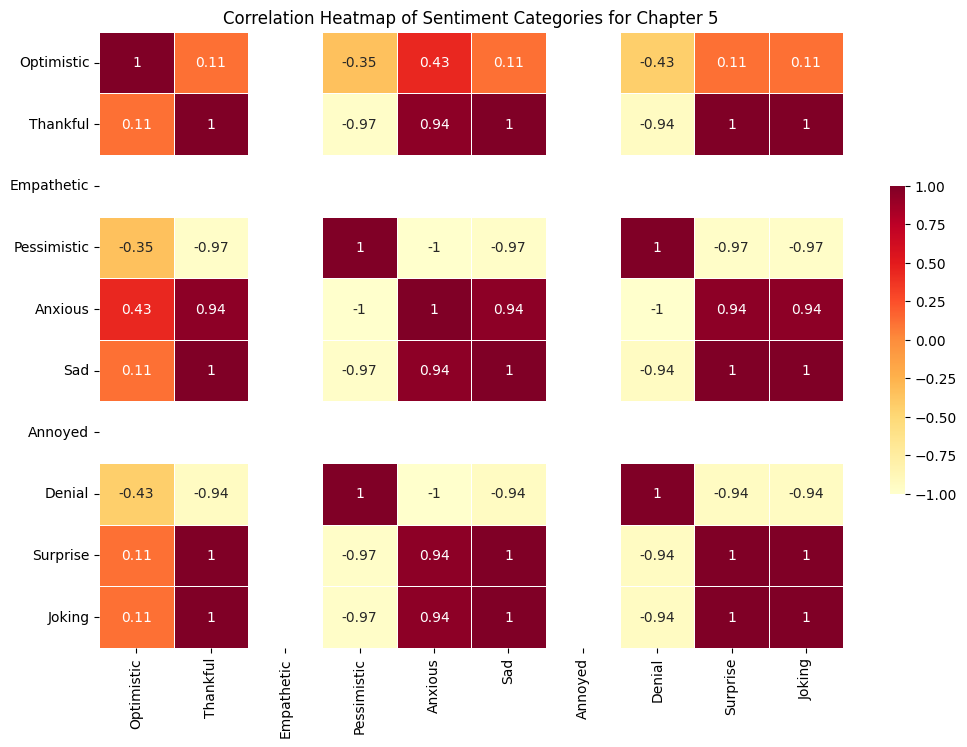

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_chapt4_list = df_list_count[:3]
df_chapt5_list = df_list_count[3:]


df_chapt4 = pd.concat(df_chapt4_list, axis=0)
df_chapt5 = pd.concat(df_chapt5_list, axis=0)


corr_chapt4 = df_chapt4.corr()
corr_chapt5 = df_chapt5.corr()

# Create the heatmaps
def plot_heatmap(corr_matrix, chapter_num):
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', linewidths=.5, cbar_kws={'shrink': 0.5})
    plt.title(f'Correlation Heatmap of Sentiment Categories for Chapter {chapter_num}')
    plt.show()

# Plot correlation heatmaps for each chapter
plot_heatmap(corr_chapt4, 4)
plot_heatmap(corr_chapt5, 5)


